In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

# import os

# # !pip install fire
# # !pip install tqdm

# home_dir = '/content/gdrive/My Drive/A0/aispace'
# os.chdir(home_dir)
# !pwd

# import os
# # Get the current working directory
# current_directory = os.getcwd()
# print(current_directory)

# import shutil
# import os

In [3]:
# !pip install rasterio
# !pip install accelerate
# !pip install peft
# !pip install transformers
# # !pip install transformers==4.34.0
# !pip install datasets

In [4]:
KAGGLE = False
if KAGGLE == True:
    # Define the input and output directories
    input_directory  = '/kaggle/input/begreat'  # Replace with the path to your input directory
    output_directory = '/kaggle/working'  # Replace with the path to your output directory

    def input_copy(input_directory, output_directory):
        # Get a list of files in the input directory
        files_to_copy = os.listdir(input_directory)
        # Iterate through the files and copy them to the output directory
        for file_name in files_to_copy:
            # Create the full paths for the source and destination
            source_file = os.path.join(input_directory, file_name)
            destination_file = os.path.join(output_directory, file_name)

            # Copy the file from the source to the destination
            shutil.copy(source_file, destination_file)

        # Get a list of files in the input directory
        files = os.listdir(output_directory)
        print(files)

    input_copy(input_directory, output_directory)

    source_directory  = '/kaggle/input/'  # Replace with the path to your input directory
    destination_directory = '/kaggle/working/input'  # Replace with the path to your output directory

    # Copy the source directory to the destination directory
    shutil.copytree(source_directory, destination_directory)

    input_copy(input_directory, output_directory)

In [5]:
import numpy as np

import great
from great import GReaT

import pandas as pd

################################
import numpy as np

import pandas as pd

# all imports should go here

import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

import sklearn
from sklearn.model_selection import train_test_split

import skimage.exposure

# access package for AWS access
# import boto3

import sys
import os
import subprocess
import datetime
import platform
import datetime

from tqdm import tqdm

# import ee
import h5py
import numpy as np
from datetime import datetime, timedelta  # Import timedelta here
import random
import pandas as pd

import time
import rasterio as rio
################################

from hlsdataset import HLSDataSet

import shutil

# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

In [6]:
class HLSInference(HLSDataSet):
    def __init__(self, doy=211, table_dtype = 'float16', path='./aispace/data/L8-100x100'):
        super().__init__(table_dtype = table_dtype, path=path)
        # self.model = model
        self.doy_to_impute = doy

        self.imputed_data = None
        self.recovered_data = None

        self.imputed_file = ''

        # self.nan_data = self.to_impute #.copy()    # to_impute.copy()
        # display(self.nan_data)
        #### for only one day processing ###########################
        self.nan_data_doy = None # self.nan_data.loc[(self.nan_data['DOY'] == doy)]
        self.nan_data_doy = None #  self.nan_data_doy.reset_index(drop=True)

        self.data_doy = None #  self.clear_data.loc[(self.clear_data['DOY'] == doy)]
        self.data_doy = None #  self.data_doy.reset_index(drop=True)

        # self.nan_data_resid  = self.nan_data.loc[(nan_data['DOY'] != doy)]
        # self.nan_data_resid  = self.nan_data_resid.reset_index(drop=True)

    def _impute(self, model, columns_impute=['B02', 'B03', 'B04', 'PID', 'DOY'], device='cuda', k=400, max_length=1000, temperature=0.01):

        self.nan_data_doy = self.to_impute.loc[(self.to_impute['DOY'] == self.doy_to_impute)]
        self.nan_data_doy = self.nan_data_doy.reset_index(drop=True)

        self.data_doy = self.clear_data.loc[(self.clear_data['DOY'] == self.doy_to_impute)]
        self.data_doy = self.data_doy.reset_index(drop=True)

        # print(f'to impute data:')
        # display(self.nan_data_doy)
        print(f'to impute data:')
        display(self.nan_data_doy)
        display(self.data_doy)

        # fn

        print(f'NumPy version:{np.__version__}')
        np.float = float

        # Get the DataFrame with columns in reverse order
        # self.nan_data_doy = self.nan_data_doy[self.nan_data_doy.columns[::-1]].copy()

        _impute = self.nan_data_doy[columns_impute].copy()
        # self.imputed_data = pd.read_csv('imputed.csv')
        self.imputed_data = model.impute(_impute, k=k, max_length=max_length, temperature=temperature, device=device)
        self.imputed_data.to_csv('imputed2.csv')
        
        # imputed_file = f'A0[optim_sophia]/imputed_output_run[3].csv'
        # self.imputed_data = pd.read_csv(imputed_file)
        # self.imputed_data = self.nan_data_doy.copy()

        print(self.nan_data_doy.columns, self.imputed_data.columns)
        print(self.nan_data_doy.shape, self.imputed_data.shape)

        # Merge the dataframes by X and Y columns and replace B3 in df1 with B3 from df2
        merged_df = self.nan_data_doy.merge(self.imputed_data, on=['PID', 'DOY'], suffixes=('', '_df2'), how='left')  
        # Replace the original B3 column with B3 from df2
        merged_df['B02'] = merged_df['B02_df2']
        merged_df['B03'] = merged_df['B03_df2']
        merged_df['B03'] = merged_df['B03_df2']
        
        # Drop the additional B3_df2 column
        merged_df = merged_df.drop('B02_df2', axis=1)
        merged_df = merged_df.drop('B03_df2', axis=1)
        merged_df = merged_df.drop('B04_df2', axis=1)

        self.imputed_data = merged_df.copy()
        
        print(self.nan_data_doy.columns, self.imputed_data.columns)
        print(self.nan_data_doy.shape, self.imputed_data.shape)
        # fn
        # cols = self.nan_data_doy.columns 
        # self.imputed_data

        # Get the DataFrame with columns in reverse order
        self.imputed_data = self.imputed_data[self.imputed_data.columns[::-1]].copy()

        if len(self.imputed_data) != len(self.nan_data_doy):
            print('len(self.imputed_data) != len(self.nan_data_doy)')
            # Use the merge function with indicator=True
            original_df = self.nan_data_doy
            subset_df = self.imputed_data

            merged_df = pd.merge(original_df, subset_df, on=['PID', 'DOY'], how='left', indicator=True)

            # Find the rows in original_df that are not in subset_df
            missing_rows = original_df[merged_df['_merge'] == 'left_only']

            # Display the missing rows
            # display(missing_rows)

            self.imputed_data = pd.concat([self.imputed_data, missing_rows], axis=0)


            # display(self.imputed_data)

            # fn

        self.recovered_data = pd.concat([self.imputed_data, self.data_doy], axis=0)
        self.recovered_data = self.recovered_data.reset_index(drop=True)

        print('imputed_data')
        display(self.imputed_data)

        print('recovered_data')
        display(self.recovered_data)

        return self.recovered_data

    def _set_inference_recovered(self,):
       self.inference_data = self.recovered_data
       self.inference_data = self.inference_data.sort_values(by=['Y', 'X', 'DOY', ])

       return self.inference_data

    def _save_recovered(self, imputed_file=f'recovered_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.recovered_data.to_csv(self.imputed_file)

    def _read_recovered(self, imputed_file=f'recovered_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.recovered_data = pd.read_csv(self.imputed_file)
        # display(self.imputed_data)
        # ######### CLEAR UNNAMED COLUMNS FROM DATASETS #######################################
        self.recovered_data = self.recovered_data.loc[:, ~self.recovered_data.columns.str.contains('^Unnamed')]
        return self.recovered_data

    def _save_imputed(self, imputed_file=f'imputed_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.imputed_data.to_csv(self.imputed_file)

    def _read_imputed(self, imputed_file=f'imputed_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.imputed_data = pd.read_csv(self.imputed_file)
        # display(self.imputed_data)
        # ######### CLEAR UNNAMED COLUMNS FROM DATASETS #######################################
        self.imputed_data = self.recovered_data.loc[:, ~self.recovered_data.columns.str.contains('^Unnamed')]
        return self.imputed_data

/home
NumPy version:1.26.1
<class 'float'>
PIDs is  9999
[203]


/home/aispace/hlsdataset.py:210: RuntimeWarning: invalid value encountered in cast
  normalized_band = ((band - min_val) / (max_val - min_val) * 255).astype(np.uint8)


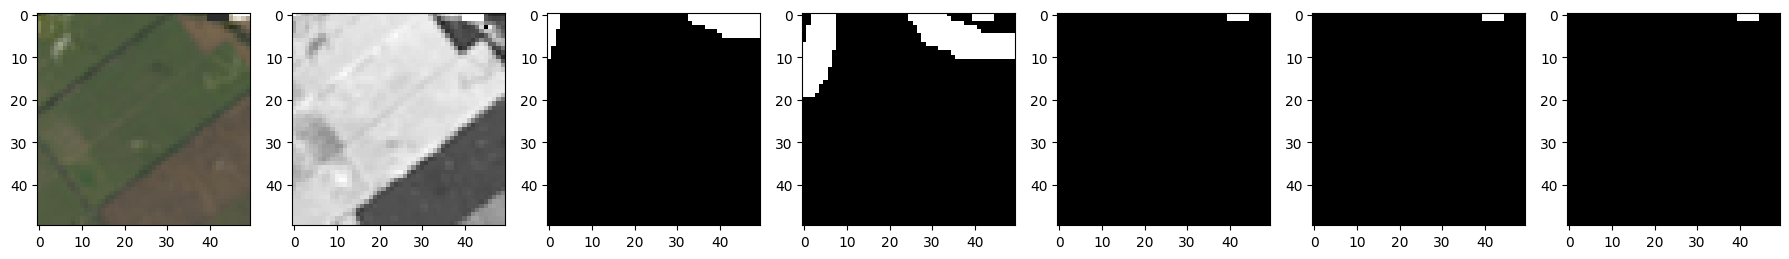

[211]


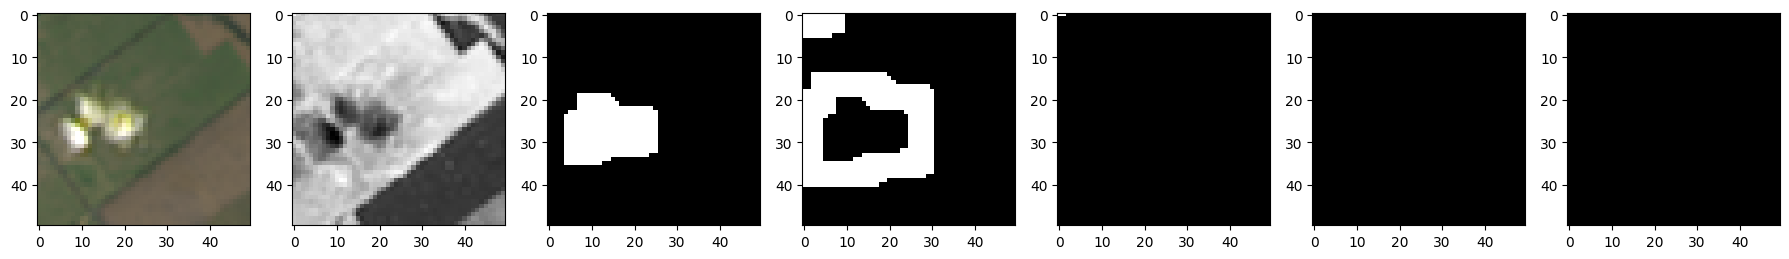

[219]


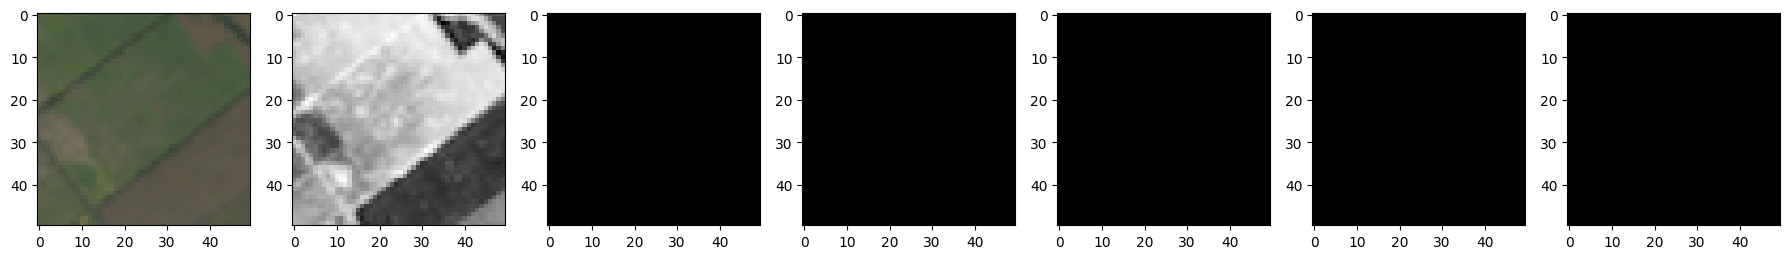

,Unnamed: 0,B01,B02,B03,B04,B05,B06,B07,B09,B10,...,aero,SAA,SZA,VAA,VZA,X,Y,DOY,NDVI,PID
0,3570050,-412.0,-199.0,497.0,241.0,5493.0,2264.0,1095.0,9.0,1924.0,...,3,14728,3340,23265,99,1550,975,203,0.915940,5050
1,3570051,-166.0,59.0,628.0,543.0,4778.0,2566.0,1533.0,9.0,1979.0,...,3,14728,3340,23277,99,1551,975,203,0.795903,5150
2,3570052,162.0,342.0,865.0,774.0,4477.0,2448.0,1419.0,10.0,1982.0,...,3,14728,3340,23289,99,1552,975,203,0.705199,5250
3,3570053,430.0,589.0,1075.0,944.0,4757.0,2386.0,1252.0,11.0,1966.0,...,3,14728,3340,23301,100,1553,975,203,0.668830,5350
4,3570054,351.0,511.0,996.0,836.0,4947.0,2394.0,1201.0,10.0,1964.0,...,3,14728,3340,23313,100,1554,975,203,0.710877,5450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,3749435,262.0,338.0,591.0,576.0,1950.0,2081.0,1194.0,9.0,2765.0,...,2,14999,3693,24386,119,1595,1024,219,0.543943,9599
7496,3749436,271.0,350.0,606.0,577.0,2002.0,2068.0,1179.0,9.0,2771.0,...,2,14999,3693,24395,119,1596,1024,219,0.552540,9699
7497,3749437,266.0,345.0,597.0,566.0,2000.0,2089.0,1193.0,14.0,2775.0,...,2,14999,3693,24403,119,1597,1024,219,0.558846,9799
7498,3749438,268.0,348.0,596.0,573.0,2025.0,2122.0,1215.0,13.0,2773.0,...,2,14999,3693,24411,119,1598,1024,219,0.558891,9899


Change columns list: ['Unnamed: 0', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B09', 'B10', 'B11', 'cirrus', 'cloud', 'adj_cloud', 'cloud_shadow', 'snow_ice', 'water', 'aero', 'SAA', 'SZA', 'VAA', 'VZA', 'X', 'Y', 'DOY', 'NDVI', 'PID']->['B02', 'B03', 'B04', 'B05', 'NDVI', 'X', 'Y', 'DOY', 'PID']
clear


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,563.0,958.0,800.0,4784.0,0.713467,1558.0,975.0,203.0,5850.0
1,253.0,740.0,537.0,4750.0,0.796860,1559.0,975.0,203.0,5950.0
2,237.0,706.0,501.0,4715.0,0.807899,1560.0,975.0,203.0,6050.0
3,264.0,729.0,532.0,4745.0,0.798370,1561.0,975.0,203.0,6150.0
4,268.0,735.0,528.0,4834.0,0.803059,1562.0,975.0,203.0,6250.0
...,...,...,...,...,...,...,...,...,...
6300,338.0,591.0,576.0,1950.0,0.543943,1595.0,1024.0,219.0,9599.0
6301,350.0,606.0,577.0,2002.0,0.552540,1596.0,1024.0,219.0,9699.0
6302,345.0,597.0,566.0,2000.0,0.558846,1597.0,1024.0,219.0,9799.0
6303,348.0,596.0,573.0,2025.0,0.558891,1598.0,1024.0,219.0,9899.0


train_data [203. 211. 219.]


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,563.0,958.0,800.0,4784.0,0.713467,1558.0,975.0,203.0,5850.0
1,253.0,740.0,537.0,4750.0,0.796860,1559.0,975.0,203.0,5950.0
2,237.0,706.0,501.0,4715.0,0.807899,1560.0,975.0,203.0,6050.0
3,264.0,729.0,532.0,4745.0,0.798370,1561.0,975.0,203.0,6150.0
4,268.0,735.0,528.0,4834.0,0.803059,1562.0,975.0,203.0,6250.0
...,...,...,...,...,...,...,...,...,...
6275,338.0,591.0,576.0,1950.0,0.543943,1595.0,1024.0,219.0,9599.0
6276,350.0,606.0,577.0,2002.0,0.552540,1596.0,1024.0,219.0,9699.0
6277,345.0,597.0,566.0,2000.0,0.558846,1597.0,1024.0,219.0,9799.0
6278,348.0,596.0,573.0,2025.0,0.558891,1598.0,1024.0,219.0,9899.0


test_data


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,407.0,677.0,709.0,2078.0,0.491209,1595.0,1020.0,211.0,9595.0
1,378.0,645.0,639.0,2181.0,0.546809,1596.0,1020.0,211.0,9695.0
2,352.0,614.0,606.0,2098.0,0.551775,1597.0,1020.0,211.0,9795.0
3,352.0,622.0,605.0,2138.0,0.558877,1598.0,1020.0,211.0,9895.0
4,357.0,636.0,622.0,2208.0,0.560424,1599.0,1020.0,211.0,9995.0
5,375.0,678.0,676.0,2250.0,0.537936,1595.0,1021.0,211.0,9596.0
6,373.0,656.0,662.0,2144.0,0.528154,1596.0,1021.0,211.0,9696.0
7,354.0,632.0,629.0,2111.0,0.540876,1597.0,1021.0,211.0,9796.0
8,343.0,621.0,595.0,2182.0,0.571480,1598.0,1021.0,211.0,9896.0
9,348.0,624.0,589.0,2208.0,0.578834,1599.0,1021.0,211.0,9996.0


to_impute:


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,NaN,NaN,NaN,NaN,NaN,1550.0,975.0,203.0,5050.0
1,NaN,NaN,NaN,NaN,NaN,1551.0,975.0,203.0,5150.0
2,NaN,NaN,NaN,NaN,NaN,1552.0,975.0,203.0,5250.0
3,NaN,NaN,NaN,NaN,NaN,1553.0,975.0,203.0,5350.0
4,NaN,NaN,NaN,NaN,NaN,1554.0,975.0,203.0,5450.0
...,...,...,...,...,...,...,...,...,...
5,NaN,NaN,NaN,NaN,NaN,1590.0,976.0,203.0,9051.0
6,NaN,NaN,NaN,NaN,NaN,1591.0,976.0,203.0,9151.0
7,NaN,NaN,NaN,NaN,NaN,1592.0,976.0,203.0,9251.0
8,NaN,NaN,NaN,NaN,NaN,1593.0,976.0,203.0,9351.0


/home/aispace/hlsdataset.py:547: RuntimeWarning: invalid value encountered in cast
  normalized_band = ((band - min_val) / (max_val - min_val) * 255).astype(np.uint8)
/home/aispace/hlsdataset.py:547: RuntimeWarning: invalid value encountered in cast
  normalized_band = ((band - min_val) / (max_val - min_val) * 255).astype(np.uint8)


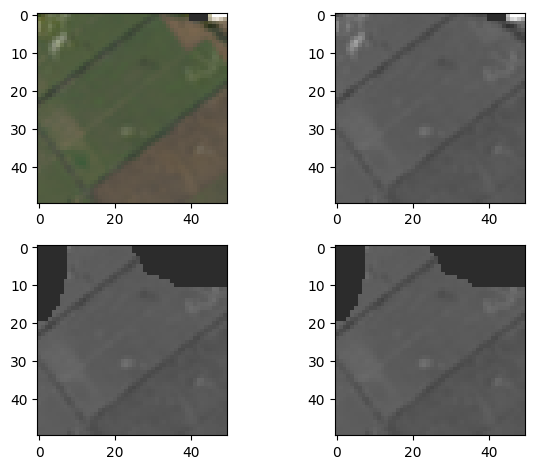

/home/aispace/hlsdataset.py:547: RuntimeWarning: invalid value encountered in cast
  normalized_band = ((band - min_val) / (max_val - min_val) * 255).astype(np.uint8)


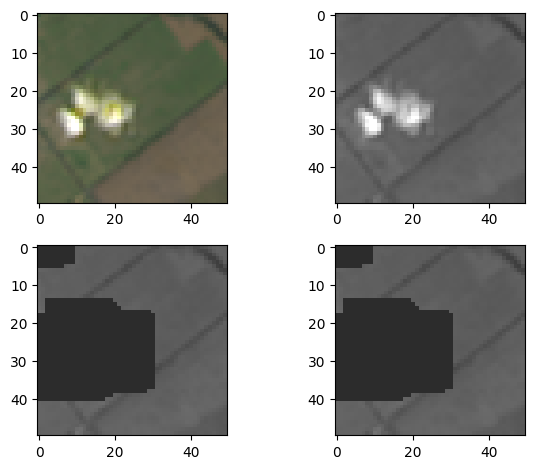

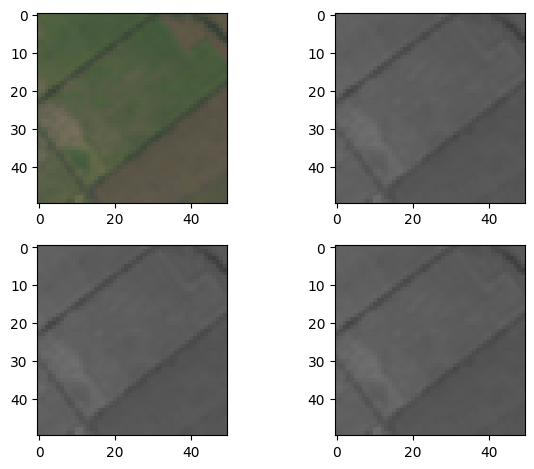

In [7]:
os.environ['TRANSFORMERS_NO_ADVISORY_WARNINGS'] = 'true'

# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

print(f'NumPy version:{np.__version__}')
np.float = float # 'float32' # float
table_dtype = np.float  #'float32'
print(table_dtype)

# hls_data = HLSDataSet(table_dtype = table_dtype)
hls_data = HLSInference(table_dtype = table_dtype)

hls_data.clip_dataset(x1=50.0, y1=50.0, x2=100.0, y2=100.0)

doys = [171, 179, 187, 195, 203, 211, 219]
doys = [203, 211, 219]
df = hls_data._get_data_doys(doys = doys, SHOW=True)
display(df)

# df = hls_data._set_columns_name()
# display(df)

df1, df2 = hls_data._nan_9999()
# display(df1)
# display(df2)

df1, df2 = hls_data._set_clear_cloud()
# display(df1)
# display(df2)

data, nan, clear, cloud = hls_data._set_train_columns_name()

print('clear')
display(clear)

# train_data, test_data = hls_data._set_train_test_data(doy=211.0, x1=60.0, y1=40.0, x2=75.0, y2=55.0)

train_data, test_data = hls_data._set_train_test_data(doy=211.0, x1=45.0, y1=45.0, x2=50.0, y2=50.0, for_show_nan=False)
# train_data, test_data = hls_data._set_timeseries_train_test_data(doy=211.0, x1=50.0, y1=50.0, x2=100.0, y2=100.0)

print('train_data', train_data['DOY'].unique())
display(train_data)
print('test_data')
display(test_data)
# display(data)
# display(nan)
# display(clear)
# display(cloud)

to_impute = hls_data._to_impute()
hls_data._inference_train_test_data()
hls_data._inference_imshow()

# fn

In [8]:
def GetModel(train_data, experiment_dir = 'A0[float]', load_model_path = 'run[3]/checkpoint-30000', tokenizer='aispace-tokenizer',):

    data = train_data.copy()
    # Get the DataFrame with columns in reverse order
    # data = data[data.columns[::-1]].copy()

    print(data.dtypes.tolist())
    # Reset the index to remove it
    data = data.reset_index(drop=True)
    display(data)

    # Get the current CPU time in seconds since the epoch
    current_time = int(time.time())
    # Use the current time as a seed for a random number generator
    random_seed_state = current_time  # You can use this random_state for various random processes

    EXP_NAME = 'exp-A100'
    EXP_NAME = 'exp-V100'
    EXP_NAME = 'exp-T4'

    EXP_NAME = 'A0[float]'

    step_checkpoint = 12000
    #### TRAINER HYPERPARAMETERS #############################
    save_steps = 1000
    logging_steps = 1
    
    epochs = 1
    batch_size = 1
    
    learning_rate = 1e-12
    lr_scheduler_type = 'constant'
    # lr_scheduler_type = 'cosine'
    num_cycles = 4
    
    warmup_steps = 5000
    
    optimizer = 'sophia'
    ##########################################################

    efficient_finetuning = ''

    # experiment_dir = 'A0[float]'
    # load_model_path = 'A0[float]/run[3]/checkpoint-30000'

    load_model_path = f'{experiment_dir}/{load_model_path}'


    print('experiment_dir :', experiment_dir)
    print('load_model_path:', load_model_path)

    # load_model_path = 'load_model/checkpoint-16000'
    model = GReaT(llm=load_model_path,
                  # tokenizer=load_model_path,
                  tokenizer='aispace-tokenizer',
                  batch_size=batch_size, epochs=epochs, 
                  logging_steps=logging_steps, save_steps=save_steps,
                  # evaluation_strategy='steps',
                  # dataloader_num_workers=2, #fp16=True,
                  logging_first_step=True,
                  save_total_limit=2,
                  prediction_loss_only=True,
                  experiment_dir=experiment_dir,
                  dataloader_num_workers=2,
                  efficient_finetuning = efficient_finetuning,
                  learning_rate=learning_rate,
                  lr_scheduler_type=lr_scheduler_type,
                  warmup_steps = warmup_steps,
                  num_cycles = num_cycles,
                  # warmup_ratio=0.05,
                  seed=current_time,
                  data_seed=current_time+int(time.time()),
                  # optim=TRAINER_DICT['optimizer'],
                  fp16 = True,
                  # torch_compile=True,   #### uncomment for Ampere
                  # bf16=True,            #### uncomment for Ampere
                  )

    # model.load_from_dir(f'{load_model_path}')
    print(f'----------- Model architecture, efficient_finetuning: {efficient_finetuning} -----------------------')
    print(model.model)
    print(f'----------------------------------------------------------------------------------------------------')
    # fn
    optimizer_fit = 'sophia'
    
    model.fit(data=data[0:2])    #, resume_from_checkpoint=True)
    # model.fit(data[0:1])

    return model

# fn
# model.fit(data=train_data, test_data=test_data)

# TRAINER_DICT.to_csv(f'{experiment_dir}.csv')

In [ ]:
chkpt_list = [30000, 30000, 30000, 30000, 12000, 9000, 11000]
chkpt_list = [8000, 8000, 8000, 16000, ]
chkpt_list = [8000, 8000, 8000, 16000, ]
chkpt_list = [32000, 32000, 64000, 32000, 28000, 28000, 28000]
chkpt_list = [7000, 105000, 71000, 32000, 22000, 112000, 112000, 112000]
chkpt_list = [24000, 152000, ]

!pwd

i_run = 1

experiment_dir = 'A0[optim_sophia]'
experiment_dir = 'A0[great_sophia]'
experiment_dir = 'A0[RGB_TOK[ai]_sophia]'
experiment_dir = f'A0[ONE_TOK[ai]]'

# fn

load_model_path_list = []

for i_run, chkpt in enumerate(chkpt_list):
    load_model_path_list.append(f'run[{i_run}]/checkpoint-{chkpt}')
    # load_model_path_list.append(f'run[{i_run}]/model')

print(load_model_path_list)
# fn

##### FOR ONE MANUAL PATHING #############################
# experiment_dir=f'{experiment_dir}'
# load_model_path=f'run[{i_run}]/checkpoint-16000'

# model = GetModel(train_data, experiment_dir = experiment_dir, load_model_path = load_model_path)

# recovered_data = hls_data._impute(model=model, k=10000, max_length=5000) #, device='cpu')

# recovered_file = f'{experiment_dir}/recovered_output_run[{i_run}].csv'
# hls_data._save_recovered(imputed_file=recovered_file)
# imputed_file = f'{experiment_dir}/imputed_output_run[{i_run}].csv'
# hls_data._save_imputed(imputed_file=imputed_file)
######################################################################

# fn

# for i_run, load_model_path in enumerate(load_model_path_list[-1]):
# i_run = 4
load_model_path = load_model_path_list[-1]

print('i_run:', i_run, load_model_path)
# fn
# load_model_path_list=f'run[{i_run}]/checkpoint-16000'
train_columns_list = ['B02', 'B03', 'B04', 'PID', 'DOY']

model = GetModel(train_data[train_columns_list], 
                 experiment_dir = experiment_dir, 
                 load_model_path = load_model_path, 
                 # tokenizer='distilgpt2')
                 tokenizer='aispace-tokenizer')
# model = []

recovered_data = hls_data._impute(model=model, k=10000, max_length=1000, temperature=0.01) #, device='cpu')

imputed_file = f'{experiment_dir}/recovered_output_run[{i_run}].csv'
hls_data._save_recovered(imputed_file=imputed_file)

imputed_file = f'{experiment_dir}/imputed_output_run[{i_run}].csv'
hls_data._save_imputed(imputed_file=imputed_file)

/home
['run[0]/checkpoint-24000', 'run[1]/checkpoint-152000']
i_run: 1 run[1]/checkpoint-152000
[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


,B02,B03,B04,PID,DOY
0,563.0,958.0,800.0,5850.0,203.0
1,253.0,740.0,537.0,5950.0,203.0
2,237.0,706.0,501.0,6050.0,203.0
3,264.0,729.0,532.0,6150.0,203.0
4,268.0,735.0,528.0,6250.0,203.0
...,...,...,...,...,...
6275,338.0,591.0,576.0,9599.0,219.0
6276,350.0,606.0,577.0,9699.0,219.0
6277,345.0,597.0,566.0,9799.0,219.0
6278,348.0,596.0,573.0,9899.0,219.0


experiment_dir : A0[ONE_TOK[ai]]
load_model_path: A0[ONE_TOK[ai]]/run[1]/checkpoint-152000
----------- Model architecture, efficient_finetuning:  -----------------------
GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Li

Optimiser: Sophia
self.train_hyperparameters: {'logging_steps': 1, 'save_steps': 1000, 'logging_first_step': True, 'save_total_limit': 2, 'prediction_loss_only': True, 'dataloader_num_workers': 2, 'learning_rate': 1e-12, 'lr_scheduler_type': 'constant', 'warmup_steps': 5000, 'seed': 1699418832, 'data_seed': 3398837664, 'fp16': True}
total_train_steps calculated: 3 2 1
warmup_steps: 5000
lr_scheduler_type: constant


wandb: Currently logged in as: koya09ua (koyaua). Use `wandb login --relogin` to force relogin


Step,Training Loss
1,8.594500
2,6.715700


to impute data:


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,NaN,NaN,NaN,NaN,NaN,1550.0,975.0,211.0,5050.0
1,NaN,NaN,NaN,NaN,NaN,1551.0,975.0,211.0,5150.0
2,NaN,NaN,NaN,NaN,NaN,1552.0,975.0,211.0,5250.0
3,NaN,NaN,NaN,NaN,NaN,1553.0,975.0,211.0,5350.0
4,NaN,NaN,NaN,NaN,NaN,1554.0,975.0,211.0,5450.0
...,...,...,...,...,...,...,...,...,...
824,NaN,NaN,NaN,NaN,NaN,1563.0,1015.0,211.0,6390.0
825,NaN,NaN,NaN,NaN,NaN,1564.0,1015.0,211.0,6490.0
826,NaN,NaN,NaN,NaN,NaN,1565.0,1015.0,211.0,6590.0
827,NaN,NaN,NaN,NaN,NaN,1566.0,1015.0,211.0,6690.0


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,333.0,722.0,563.0,4134.0,0.760273,1560.0,975.0,211.0,6050.0
1,341.0,731.0,571.0,4168.0,0.759021,1561.0,975.0,211.0,6150.0
2,334.0,735.0,554.0,4358.0,0.774430,1562.0,975.0,211.0,6250.0
3,308.0,707.0,503.0,4450.0,0.796891,1563.0,975.0,211.0,6350.0
4,313.0,699.0,512.0,4221.0,0.783647,1564.0,975.0,211.0,6450.0
...,...,...,...,...,...,...,...,...,...
1666,372.0,677.0,698.0,2116.0,0.503909,1595.0,1024.0,211.0,9599.0
1667,372.0,696.0,702.0,2172.0,0.511482,1596.0,1024.0,211.0,9699.0
1668,348.0,655.0,657.0,2141.0,0.530379,1597.0,1024.0,211.0,9799.0
1669,339.0,631.0,633.0,2149.0,0.544932,1598.0,1024.0,211.0,9899.0


NumPy version:1.26.1


  0%|          | 0/829 [00:00<?, ?it/s]/home/aispace/great.py:509: UserWarning: Max retries reached.
  warnings.warn("Max retries reached.")
  0%|          | 1/829 [02:08<29:39:57, 128.98s/it]wandb: Network error (TransientError), entering retry loop.
/home/aispace/great.py:509: UserWarning: Max retries reached.
  warnings.warn("Max retries reached.")
  0%|          | 2/829 [04:17<29:30:38, 128.46s/it]

In [ ]:

i_run=1

# imputed_file = f'{experiment_dir}/imputed_output_run[{i_run}].csv'
# imputed_data = hls_data._read_imputed(imputed_file)

imputed_file = f'{experiment_dir}/recovered_output_run[{i_run}].csv'
recovered_data = hls_data._read_recovered(imputed_file)

# display(imputed_data)
print('recovered_data')
display(recovered_data)

hls_data._set_inference_recovered()
hls_data._inference_imshow()


# fn
# experiment_dir = 'A0[shuf_sophia]'
# experiment_dir = 'A0[great_sophia]'
imputed_file = f'{experiment_dir}/recovered_output_run[{i_run}].csv'
for i_run in range(4,5):
  imputed_file = f'{experiment_dir}/recovered_output_run[{i_run}].csv'
  recovered_data = hls_data._read_recovered(imputed_file)

  hls_data._set_inference_recovered()
  hls_data._inference_imshow()
# display(recovered_data)
# recovered_data = pd.read_csv(imputed_file)

# display(recovered_data)

In [ ]:
# hls_data._imputed_data(recovered_data)

hls_data._set_inference_recovered()

# hls_data._inference_train_test_data()
hls_data._inference_imshow()

In [ ]:
fn

In [ ]:
# #### TEST METRICS ##################
# nan_data = test_data.copy()
# nan_data = nan_data.reset_index(drop=True)

# print(nan_data.dtypes.tolist())

# display(nan_data)
# print(nan_data.columns)
# # fn

# print(f'NumPy version:{np.__version__}')
# np.float = float

# imputed_data = model.impute(nan_data, k=256, max_length=50000, temperature=0.01) #, device='cpu')
# imputed_data.to_csv('test_imputed_output.csv')

# # imputed_data = pd.read_csv('imputed_output.csv')
# # ######### CLEAR UNNAMED COLUMNS FROM DATASETS #######################################
# # imputed_data = imputed_data.loc[:, ~imputed_data.columns.str.contains('^Unnamed')]

In [ ]:





impute = HLSInference(model, doy=211.0)

impute._impute()

imputed_file = f'{experiment_dir}/imputed_output.csv'
impute._save_recovered(imputed_file = imputed_file)


fn
#### INFERENCE DATA #####################################
# nan_data = test_data[test_data.isnull().any(axis=1)].astype('float64').copy()
nan_data = to_impute.copy()
# nan_data.astype('int16')
# Reset the index to remove it
#### for only one day processing ###########################
nan_data_impute = nan_data.loc[(nan_data['DOY'] == 211.0)]
nan_data_resid  = nan_data.loc[(nan_data['DOY'] != 211.0)]
nan_data_impute = nan_data_impute.reset_index(drop=True)
nan_data_resid  = nan_data_resid.reset_index(drop=True)

print(nan_data.dtypes.tolist())

display(nan_data_impute)
print(nan_data_impute.columns)
# fn

print(f'NumPy version:{np.__version__}')
np.float = float

imputed_file = f'{experiment_dir}_imputed_output.csv'

imputed_data = model.impute(nan_data_impute, k=256, max_length=50000, temperature=0.01) #, device='cpu')
imputed_data.to_csv(imputed_file)

# imputed_data = pd.read_csv('imputed_output.csv')
# ######### CLEAR UNNAMED COLUMNS FROM DATASETS #######################################
# imputed_data = imputed_data.loc[:, ~imputed_data.columns.str.contains('^Unnamed')]

display(nan_data_impute)
display(imputed_data)

recovered_data = pd.concat([imputed_data, nan_data_resid], axis=0)
recovered_data = recovered_data.reset_index(drop=True)

hls_data._imputed_data(recovered_data)

hls_data._inference_train_test_data()
hls_data._inference_imshow()

# imputed_data.to_csv('imputed_output.csv')

In [ ]:
imputed_data.to_csv(imputed_file)

def _image_df2(input1, input2):
    BND_LIST = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B09', 'B10', 'B11']
    FMSK_LIST = ['cirrus', 'cloud', 'adj_cloud', 'cloud_shadow', 'snow_ice', 'water', 'aero' ]
    ANG_LIST = ['SAA', 'SZA', 'VAA', 'VZA',]

    input = input1

    box_x_size = (input['X'].max() - input['X'].min() + 1).astype(int)
    box_y_size = (input['Y'].max() - input['Y'].min() + 1).astype(int)

    def _get_img_nan(input, bnd_list=['B04', 'B03', 'B02']):

        print(input['DOY'].unique())

        df = input[bnd_list].copy()

        df[df > 0] = 0
        df[df == -9999] = 1
        df[df < 0] = 0

        image = df.to_numpy()  # df[chanel_list]

        image = image.transpose()
        image = image.reshape(image.shape[0], box_x_size, box_y_size)

        nans = np.dstack((image[0,:,:], image[1,:,:], image[2,:,:]))

        return nans


    def _get_img_rgb(input, bnd_list=['B04', 'B03', 'B02']):
        df = input[bnd_list].copy()

        # df[df > 0] = 0
        df[df == -9999] = np.nan
        # df[df < 0] = 0

        image = df.to_numpy()

        image = image.transpose()
        image = image.reshape(image.shape[0], box_x_size, box_y_size)

        # Convert the int16 array to int64
        # image = image.astype(np.uint64)

        r_ = (8200, 16000)
        g_ = (8500, 14000)
        b_ = (7500, 12000)


        def generalized_normalization(band, rgb):
            # Apply your normalization method here
            # Example: Stretch and scale values to 0-255
            band = np.ma.array (band, mask=np.isnan(band))

            ### FOR HLS #################
            band = 0.0001 * band
            band = np.where(band > 0.3, 0.3, band)
            min_val = -0.063
            max_val = 0.3

            # min_val = np.min(band)
            # max_val = np.max(band)
            # min_val = rgb[0]
            # max_val = rgb[1]
            # print(f'gn:{min_val}, {max_val}')
            normalized_band = ((band - min_val) / (max_val - min_val) * 255).astype(np.uint8)
            #
            # Replace elements greater than 2000 with 1
            # print('band:', band.min(), band.max())
            normalized_band[normalized_band == np.nan] = 255
            return normalized_band

        # Scale the bands to 8-bit
        scaled_red = generalized_normalization(image[2,:,:], r_)
        scaled_green = generalized_normalization(image[1,:,:], g_)
        scaled_blue = generalized_normalization(image[0,:,:], b_)

        rgb = np.dstack((scaled_red, scaled_green, scaled_blue))

        return rgb

    def _get_img(input, bnd_list):
        image = input[bnd_list].to_numpy()  # df[chanel_list]

        image = image.transpose()
        image = image.reshape(image.shape[0], box_x_size, box_y_size)

        # Convert the int16 array to int64
        image = image.astype(np.uint64)

        return image[0,:,:]

    # image_nan = _get_img_nan(input, bnd_list=['B02', 'B03', 'B04'])
    image_rgb = _get_img_rgb(input1, bnd_list=['B02', 'B03', 'B04'])

    image_rgb2 = _get_img_rgb(input2, bnd_list=['B02', 'B03', 'B04'])

    image_rgb_list = [image_rgb, image_rgb2]

    # Create subplots
    fig, axes = plt.subplots(1, len(image_rgb_list), figsize=(18, 22))
    # Flatten the axes array to simplify indexing
    axes = axes.ravel()
    # print(image_rgb_list[0].shape)
    axes[0].imshow(image_rgb_list[0])
    # Loop through the images and plot them
    for ii in range(1,len(image_rgb_list)):
        axes[ii].imshow(image_rgb_list[ii], cmap='gray')  # You can specify a colormap
    plt.tight_layout()
    plt.show()

In [ ]:
clear_data = clear.copy()
clear_data = clear_data.loc[(clear_data['DOY'] == 211.0)]
test_data = pd.concat([imputed_data, clear_data], axis=0) #, ignore_index=True)

display(test_data)

# train_data = data

# Sort the DataFrame by 'X', 'Y', and 'DOY'
data = data.sort_values(by=['Y', 'X', 'DOY', ])
test_data = test_data.sort_values(by=['Y', 'X', 'DOY'])


doys = [171, 179, 187, 195, 203, 211, 219]
doys = [203, 211, 219]
doys = [211]
# train_doys = [219]
# train_data_list = []
otput_data_list = []
for doy in doys:
    # data = _get_hls(doy)
    # croped_data = _crop_data(data, doy)
    tr_df = data[ data['DOY'] == float(doy)].copy()
    tr_df2 = test_data[ test_data['DOY'] == float(doy)].copy()
    # otput_data_list.append(tr_df)
    _image_df2(tr_df, tr_df2)

In [ ]:
fn

In [ ]:
data = clear.copy() #[0:1000]

table_dtype = 'int16'

data = data.astype(table_dtype)
print(data.dtypes.tolist())
# Reset the index to remove it
data = data.reset_index(drop=True)
# train_data.columns = final_columns_list
# display(data)


# Split the DataFrame into training and test DataFrames
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data = train_data.reset_index(drop=True)
display(train_data)
test_data = test_data.reset_index(drop=True)
display(test_data)

# #### FOR CPU USABILITY, for 2 pixels #################################
# epochs_steps = 1  # 250 #50
# save_steps = 1   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 1 # 250 #25 #9380  #1000

#### FOR T-4 GPU USABILITY################################
epochs_steps = 200   # 250 #50
save_steps = 100   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
logging_steps = 50 # 250 #25 #9380  #1000
#### batch_size = 250 for T4
batch_size = 200 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
#######################################

# #### FOR V-100 GPU USABILITY################################
# epochs_steps = 200   # 250 #50
# save_steps = 1000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 200 # 250 #25 #9380  #1000
# #### batch_size = 250 for T4
# batch_size = 232 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
# #######################################

# #### FOR A-100 GPU USABILITY################################
# epochs_steps = 800   # 250 #50
# save_steps = 10000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 500 # 250 #25 #9380  #1000
# #### batch_size = 250 for T4
# batch_size = 800 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
# #######################################

EXP_NAME = 'exp-A100'
EXP_NAME = 'exp-V100'
EXP_NAME = 'exp-T4'

EXP_NAME = 'A0BASE'

#### 1 ###########
# learning_rate = 5e-5
# lr_scheduler_type = 'constant' # constant_with_warmup

step_checkpoint = 16000
######### SET TRAINER_RUN ARGUMENTS ##########################
learning_rate = 0.00001
lr_scheduler_type = 'cosine_with_restarts'
lr_scheduler_type = 'constant_with_warmup'
lr_scheduler_type = 'cosine'
lr_scheduler_type = 'linear'

TRAINER_RUN = 0
if TRAINER_RUN == 0:
  load_model_path = 'distilgpt2'
  experiment_dir = f"{EXP_NAME}/run[{TRAINER_RUN}]"
elif TRAINER_RUN > 0:
  before = pd.read_csv(f'{EXP_NAME}/run[{TRAINER_RUN-1}].csv')
  load_model_path = before['experiment_dir'][0] + f'/checkpoint-{step_checkpoint}'
  experiment_dir  = f"{EXP_NAME}/run[{TRAINER_RUN}]"

TRAINER_DICT = pd.DataFrame({'EXP_NAME' : EXP_NAME}, index = [TRAINER_RUN])    # dict()


TRAINER_DICT['TRAINER_RUN'] = TRAINER_RUN
TRAINER_DICT['table_dtype'] = table_dtype
TRAINER_DICT['epochs_steps'] = epochs_steps
TRAINER_DICT['save_steps'] = save_steps
TRAINER_DICT['logging_steps'] = logging_steps
TRAINER_DICT['batch_size'] = batch_size
TRAINER_DICT['learning_rate'] = learning_rate
TRAINER_DICT['lr_scheduler_type'] = lr_scheduler_type
TRAINER_DICT['experiment_dir'] = experiment_dir

display(pd.DataFrame.from_dict(TRAINER_DICT))

##### SET experiment_dir & efficient_finetuning #######################
efficient_finetuning = ''  #'lora'
if efficient_finetuning == 'lora':
    experiment_dir = f"{experiment_dir}_{efficient_finetuning}"
##### SET experiment_dir & efficient_finetuning #######################
optimizer = 'adamw_torch'
# optimizer = 'adamw_torch_fused'  #'adamw_torch'  #'adamw_torch_fused'
if optimizer == 'adamw_torch_fused':
    experiment_dir = f"{experiment_dir}_{optimizer}"
#### SET model_save_dir through save_model #########################
# model_save_dir = f'{EXP_NAME}/ZeroModel_{efficient_finetuning}'


print('experiment_dir :', experiment_dir)
print('load_model_path:', load_model_path)


model = GReaT(llm=load_model_path,
              batch_size=batch_size, epochs=epochs_steps, logging_steps=logging_steps, save_steps=save_steps,
              # evaluation_strategy='steps',
              # dataloader_num_workers=2, #fp16=True,
              save_total_limit=2,
              prediction_loss_only=True,
              experiment_dir=f'{experiment_dir}',
              dataloader_num_workers=2,
              efficient_finetuning = efficient_finetuning,
              learning_rate=learning_rate,
              lr_scheduler_type=lr_scheduler_type,
              warmup_ratio=0.1,
              # optim=optimizer,
              fp16 = True,
              # torch_compile=True,   #### for Ampere
              # bf16=True,            #### for Ampere
              )

print(f'----------- Model architecture, efficient_finetuning: {efficient_finetuning} -----------------------')
print(model.model)
print(f'----------------------------------------------------------------------------------------------------')
# fn

model.fit(data=train_data)
# model.fit(data=train_data, test_data=test_data)

TRAINER_DICT.to_csv(f'{experiment_dir}.csv')



In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
fn

In [ ]:
fn